# Bi 621 – Problem Set 4

Our goal with this assignment is to assess the overall quality of a lane of Illumina sequencing data. We will be working with (part of) a lane of 101bp long Illumina sequence data. Our first goal is to calculate the average quality score along each of the 101bp of data we have. Once that is complete, we will extend our calculations to include variance and standard deviation, and in part 3, the median. Finally, you will calculate and then plot the distribution of quality scores at two particular basepair positions.

This assigment will take you through the algorithms step-wise. In the real world, you would update the original code to add functionality. However, since this is auto-graded, please "write new code" for each step instead of simply updating the code you have written previously.

#### Part 1
1. Copy the file ```lane1_NoIndex_L001_R1_003.fastq.gz``` from HPC to the folder **directly above** PS4 folder and reference it with the relative file path (the automated grading will fail if you do not follow this direction). This file contains 4 million Illumina reads from a stickleback experiment. Do NOT try to upload this file to GitHub.
2. Create an array called ```mean_scores``` that contains 101 elements, each a float value initialized to ```0.0```.

In [1]:
# Creates a list
mean_scores = []

# A for loop to insert 101 elements.
for i in range(101):
    
    # Adds a float to the list.
    mean_scores.append(0.0)



In [2]:
#autograder tests, do not change
assert len(mean_scores) == 101
assert mean_scores[54] == 0.0

Write a function to convert the phred score.

In [3]:
# Creates a method that takes an instance variable.
def convert_phred(letter):
    """Converts a single character into a phred score"""
    
    # Creates a variable that stores a difference 
    # of -33 of the unicode point from the instance variable. 
    x = ord(letter) - 33
    
    # returns a variable with the result.
    return x

In [4]:
#autograder tests, do not change
assert convert_phred("A") == 32, "Phred score incorrect"
assert convert_phred("@") == 31, "Phred score incorrect"
assert convert_phred("#") == 2, "Phred score incorrect"

3. Within a function called ```populate_array```, open the FASTQ file and loop through every record (*recommend testing your code with a smaller subsample of the file*). Convert the Phred quality score from a letter to its corresponding number and add it to an ongoing sum of the quality scores for each base pair. So, the quality score of the first nucleotide of every read will be summed together in position 0 of the array you create. Likewise, the quality scores of the 101th nucleotide will be stored in position 100 of the array.
4. Keep a counter called ```LN``` to keep track of the total number of lines in the file.
5. Return the array and the counter.

In [5]:
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [6]:
# Stores a file path to a variable
file = "../lane1_NoIndex_L001_R1_003.fastq"


# Creates a method that takes an instance variable.
def populate_array(file):
    
    # Creates an empty list
    mean_scores = []
   
    # A for loop to insert 101 elements.
    for i in range(0,101):
        
        # Adds a float to the list.
        mean_scores.append(0.0)
        
    # Initiates a variable.
    LN = 0
    
    # opens a text file to read and stores the text file as a variable.
    with open(file,"r") as fh:
        
        # A for loop that goes through each line in the text file.
        for line in fh:
            
            # updates the variable by an addition of one after each loop.
            LN = LN + 1
            
            # If statemnt to get the fourth line from each record in text file.
            if LN%4 == 0:
                
                
                # A for loop that goes through each character in the line.    
                for i in range(len(line)-1):
                
                        # Stores a character from line to a variable
                        char = line[i]
                        
                        # calls the method with an instance ands stores the
                        # result into a variable.
                        value = convert_phred(char)
                        
                        #  stores and sums up values into a list
                        mean_scores[i] = mean_scores[i] + value
     
                        
                        
                
        # retuns a list and a variable           
        return mean_scores, LN                 
               
    
      


In [7]:
#Use this cell to run your populate_array function

# Calls method with an instance variable
#populate_array(file)


# Stores a list and a variable from the return values of a method
mean_scores, NR = populate_array(file)

# Stores the value of number of records to a varaible.
NumRec = NR/4

In [8]:
#autograder tests, do not change
file1 = "test.fastq"
my_array, num_lines = populate_array(file1)
assert len(my_array) == 101, "Array wrong length"
assert num_lines == 400, "Wrong number of lines reported from file"
assert my_array[54] == 3498.0, "Incorrect sum in list position 54"
assert my_array[70] == 3170.0, "Incorrect sum in list position 70"

1.	Once you have completed summing the quality values, you will calculate the mean quality value at each base and store it back in the array at the appropriate position.
2.	Finally, you will print to the terminal the mean quality scores from the Illumina reads, like this:
```
# Base Pair	Mean Quality Score
0		33.8
1		27.2
2		31.9
...
```
3.	Plot these results any way you know how: using Excel, R, gnuplot... 

    **Challenge** - plot these results inline in your Jupyter Notebook.
> *Hint* - if tackling the challenge, look into [matplotlib](https://matplotlib.org/) and the "magic" command 
```
% matplotlib inline
```


In [9]:


# Prints a statement
print("# Base Pair\t","Mean Quality Score")
#populate_array(file)

# A for loop that goes through each index in the length of the list. 
for i in range(len(mean_scores)):
  
    # Divides each index in the list by the number of records and stores
    # the result back to list.
    mean_scores[i] = (mean_scores[i])/(NumRec)
    
    # Prints a statement in a specific format
    print("{0}\t{1:f}".format(i, mean_scores[i]))
   


# Base Pair	 Mean Quality Score
0	32.142458
1	32.488750
2	32.538189
3	35.798274
4	35.640014
5	35.683944
6	36.036789
7	36.218718
8	38.227435
9	38.057896
10	38.171118
11	38.151662
12	37.131284
13	38.477118
14	38.450662
15	38.262161
16	38.268317
17	38.217805
18	38.135284
19	38.085087
20	38.082105
21	37.927988
22	37.930701
23	37.916893
24	37.767422
25	37.776093
26	37.671942
27	37.600926
28	37.516072
29	37.387484
30	37.337638
31	37.460975
32	37.543444
33	37.474149
34	37.427432
35	37.373513
36	37.260646
37	37.182825
38	37.153185
39	37.020335
40	37.004509
41	36.937952
42	36.831277
43	36.684464
44	36.535511
45	36.358294
46	36.278324
47	36.095822
48	35.854086
49	35.728626
50	35.654305
51	35.382937
52	35.262687
53	35.109825
54	34.953466
55	34.755474
56	34.564167
57	34.248597
58	34.069572
59	33.850430
60	33.615026
61	33.472583
62	33.548147
63	33.406123
64	33.333294
65	33.239819
66	33.054893
67	32.917336
68	32.737946
69	32.568905
70	32.377193
71	32.164323
72	32.025463
73	31.868309
74	31.695937
75	

Text(0, 0.5, 'Mean Quality Score')

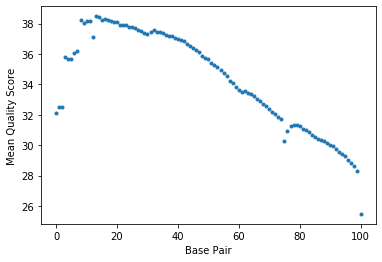

In [10]:
#Use this cell to generate your plot in Jupyter.
#Otherwise, issue a print statement so that the name of your plot file is printed.

# imports a module
import matplotlib.pyplot as plt

# The magic command that prints a plot in Jupyter notebook.
%matplotlib inline

# Plots mean scores with a point marker
plt.plot(mean_scores, '.')

# Labels X axis
plt.xlabel('Base Pair')

# Labels Y axis
plt.ylabel('Mean Quality Score')

# Part 2 – Extended statistics 

Calculate the variance and the standard deviation for each position in the Illumina reads. Do not use any statistics packages for this assigment.

1.	You will now create two additional arrays of the same size, one to hold the variance (called ```var```) and one to hold the standard deviation (called ```stdev```) for each position in the read.
2. Modify your print code to include two additional columns to print the variance and standard deviation along with the mean. Include the standard deviation in a new plot.

In [11]:
# Imports a module
import math

# Creates a list
var=[]
stdev=[]

# Creates a variable
LN = 0

# Stores a file path to a variable
file = "../lane1_NoIndex_L001_R1_003.fastq"

# A for loop to insert 101 elements.
for i in range(0,101):
        # Adds a float to the list.
        var.append(0.0)
        stdev.append(0.0)

# opens a text file to read and stores the text file as a variable.        
with open(file,"r") as fh:
        
        # A for loop that goes through each line in the text file.
        for line in fh:
            
            # updates the variable by an addition of one after each loop.
            LN = LN + 1
            
            # If statemnt to get the fourth line from each record in text file.
            if LN%4 == 0:
                
                # A for loop that goes through each character in the line.    
                for i in range(len(line)-1):
                    
                    # Stores a character from line to a variable
                    char = line[i]
                    
                    # calls the method with an instance ands stores the
                    # result into a variable.
                    value = convert_phred(char)
                    
                    # Computes the diffrence between a score value and the means 
                    # score value then squares the result. Stores the result
                    # into a list
                    var[i] += (mean_scores[i]-value)**2
                    
# A for loop that goes through each index in the length of the list.                  
for i in range(len(var)):
    
    # Divides the index by the number of records and stores the result back to list.
    var[i] = var[i]/NumRec
    
    # Square roots the index of a list and stores the result to a new list. 
    stdev[i] = math.sqrt(var[i])
    
    

In [12]:

# #                     print("DEBUG mean_scores[i]={}, value={}, i={}, temp={}, temp2={}, var[i]={}".format(
# #                         mean_scores[i], value, i, temp, temp2, var[i]))
#                     #print(var[i])
                    

In [13]:
# Prints a statement in a specific format
print("# Base Pair\t","Mean Quality Score\t", "Variance\t" "Standard Deviation")

# A for loop that goes through each index in the length of the list. 
for i in range(len(mean_scores)):
    
    # Prints a statement in a specific format
    print("{0}\t{1}\t{2}\t{3}".format(i, mean_scores[i], var[i], stdev[i]))
    




# Base Pair	 Mean Quality Score	 Variance	Standard Deviation
0	32.142458	12.952700218371163	3.598985998635055
1	32.48875	10.880134937695138	3.2985049549296024
2	32.538189	10.222612600400359	3.197282064566772
3	35.79827425	13.607210971709382	3.688795327977602
4	35.6400145	16.405214938805866	4.050335163761867
5	35.683944	16.74728160598006	4.092344267773676
6	36.0367885	7.815591605858491	2.7956379604409602
7	36.21871825	8.036954576788029	2.8349523059106354
8	38.22743475	10.666837684751082	3.266012505296188
9	38.0578965	12.03730649490885	3.469482165238618
10	38.17111775	11.333607464793001	3.36654236046318
11	38.151662	11.807116137183005	3.4361484451610944
12	37.13128425	27.840401696013693	5.276400448792121
13	38.47711775	36.09485990234785	6.0078997913037675
14	38.4506625	36.93192431221588	6.077164166962735
15	38.2621605	40.84198987312479	6.390773808634193
16	38.26831725	40.58089160197402	6.370313304851969
17	38.2178055	42.27536176509091	6.5019506123232675
18	38.13528375	45.08207455767075	6

In [14]:
#autograder tests, do not change
assert len(var) == 101
assert len(stdev) == 101
assert type(var[54]) == float
assert type(stdev[54]) == float
assert 78.3956 < var[54] < 78.3957
assert 8.8541 < stdev[54] < 8.8542
assert 96.9302 < var[89] < 96.9304
assert 9.8453 < stdev[89] < 9.8454

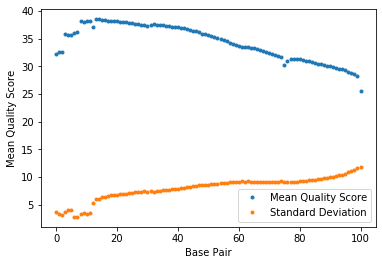

In [15]:
#Use this cell to generate your plot in Jupyter.
#Otherwise, issue a print statement so that the name of your plot file is printed.

# Imports a module
import matplotlib.pyplot as plt

# The magic command that prints a plot in Jupyter notebook.
%matplotlib inline

# Plots mean scores with a point marker
plt.plot(mean_scores, '.')

# Plots standard deviation with a point marker
plt.plot(stdev, '.')

# Labels X axis
plt.xlabel('Base Pair')

# Labels Y axis
plt.ylabel('Mean Quality Score')

# makes a legend for the figure
plt.gca().legend(('Mean Quality Score','Standard Deviation'))

# Part 3
You will now calculate the median value of each position in the read as well as the full distribution for nucleotide positions 6 and 95.

**Warning - be aware this portion is computationally intense. It will talk some time to finish running. You may want to incorporate some print statments to assure yourself your program is progressing.**

1.	You will need create a two dimensional array (called ```all_qscores```). Instead of initializing each position in your one dimensional array to 0.0, you will instead initialize each position to another empty array.
2.	Instead of simply summing each value at a particular position in the read, now you are going to store all values for that nucleotide position in the array. So, position 5 of your first array will contain an array with all the quality scores for that position from all the Illumina reads in the data set.
3.	Sort the values at each position in the array and determine the median value (store in an array called ```median```). Your program should now print for each position in the read: Base Pair, Mean, Variance, Stdev, and Median.
4.	Open a new file for writing called ```p6.tsv``` - for position 6 in the array, sum the number of occurrences of each quality score and print it out to the file.

    >*Summing the number of occurrences will give you a distribution of quality scores, that occurred in position 6 across all the reads in our data set.*
    
5.	Repeat this process for position 95 in the array in a file called ```p95.tsv```.
6.	Plot the distribution of quality scores for these two positions. If you would like to challenge yourself, plot inline with matlabplot.


In [16]:
# Creates a list
all_qscores=[]
sort_score=[]
median=[]

# Stores a file path to a variable
file = "../lane1_NoIndex_L001_R1_003.fastq"


# A for loop to insert 101 elements.
for i in range(101):
    
    # Adds an array to the list.
    all_qscores.append([])
    
    # Adds an float to the list.
    median.append(0.0)
    
    # Creates a variable
    LN = 0
    
# opens a text file to read and stores the text file as a variable.     
with open(file,"r") as fh:
    
    # A for loop that goes through each line in the text file.
    for line in fh:
        
        # updates the variable by an addition of one after each loop.
        LN = LN + 1
        
        # If statemnt to get the fourth line from each record in text file.
        if LN%4 == 0:
            
            # A for loop that goes through each character in the line.
            for i in range(len(line)-1):
           
                    # Stores a character from line to a variable
                    char = line[i]
                
                    # calls the method with an instance ands stores the
                    # result into a variable. 
                    value = convert_phred(char)
                    
                    # stores a value in a list that is an index of another list
                    all_qscores[i].append(value)
                    
                    
                
#length = len(all_qscores)
#for i in range(length):

# A for loop that goes through each index in the length of the list.
for i in range(len(all_qscores)):
   
    # sorts a list that is an index of another list
    all_qscores[i].sort()
    
    # If statement that checks if the index length of the list 
    #is divisible by two
    if len(all_qscores[i]) % 2 == 0:
        
        # If true then stores the computated mid point of the list into a varaible.
        # lenght of the list divided by 2.
        med = int(len(all_qscores[i])/2)
       
        # If true then stores the index value that is in the index position
        # before the mid way point into variable.
        medL = all_qscores[i][med-1]
        
        # If true then stores the index value that is in the index position 
        # after the mid point into variable.
        medR = all_qscores[i][med]
       
        # Stores and computes the average of the two mid points value of a 
        # even length list into a list.
        median[i] = (medL + medR)/2
       
    else:
        
        # If false then stores the computated half way point of the list into a variable.
        # lenght of the list divided by 2 into a variable
        med_odd = int(len(all_qscores[i])/2)
        
        # Stores index value at the mid point of an odd length list into a list.
        median[i]=all_qscores[i][med_odd]
        

# Prints a statement in a specific format        
print("# Base Pair\t","Mean Quality Score\t", "Variance\t", "Standard Deviation\t", "Median")               

# A for loop that goes through each index in the length of the list.
for i in range(len(mean_scores)):
    
    # Prints a statement in a specific format 
    print("{0}\t{1}\t{2}\t{3}\t{4}".format(i, mean_scores[i],var[i], stdev[i], median[i]))


# Creates an empty dictionary
dict={}
dict2={}

# opens a tsv file to write and stores the tsv file into a variable.
f1 = open("p6.tsv", "w")
f2 = open("p95.tsv", "w")

# A for loop that goes through the length of specific index that has a list. 
for i in range(len(all_qscores[6])):
    
    # If statement that checks if the value in the list is in the dictionary.
    if all_qscores[6][i] in dict.keys():
        
        # If true then add a 1 to the value of the key. 
        dict[all_qscores[6][i]]+=1
                  
                   
    else:
        
        # If false, then store 1 as a value for the key.
        dict[all_qscores[6][i]]=1
   
       
    
# A for loop that goes through the length of specific index that has a list. 
for i in range(len(all_qscores[95])):
    
    # If statement that checks if the value in the list is in the dictionary.
    if all_qscores[95][i] in dict2.keys():
       
        # If true then add a 1 to the value of the key. 
        dict2[all_qscores[95][i]]+=1
                  
                   
    else:
        
        # If false, then store 1 as a value for the key.
        dict2[all_qscores[95][i]]=1
 
# A for loop that goes through the items in the dictionary.
for key, value in dict.items():
    
    # writes the formatted output to the tsv file.
    f1.write("{0}\t{1}\n".format(key,value))
    
f1.close()
    
# writes the formatted output to the tsv file.    
for key, value in dict2.items():
    
    # writes the formatted output to the tsv file.
    f2.write("{0}\t{1}\n".format(key,value))
    
f2.close()   
                   


# Base Pair	 Mean Quality Score	 Variance	 Standard Deviation	 Median
0	32.142458	12.952700218371163	3.598985998635055	34.0
1	32.48875	10.880134937695138	3.2985049549296024	34.0
2	32.538189	10.222612600400359	3.197282064566772	34.0
3	35.79827425	13.607210971709382	3.688795327977602	37.0
4	35.6400145	16.405214938805866	4.050335163761867	37.0
5	35.683944	16.74728160598006	4.092344267773676	37.0
6	36.0367885	7.815591605858491	2.7956379604409602	37.0
7	36.21871825	8.036954576788029	2.8349523059106354	37.0
8	38.22743475	10.666837684751082	3.266012505296188	39.0
9	38.0578965	12.03730649490885	3.469482165238618	39.0
10	38.17111775	11.333607464793001	3.36654236046318	39.0
11	38.151662	11.807116137183005	3.4361484451610944	39.0
12	37.13128425	27.840401696013693	5.276400448792121	39.0
13	38.47711775	36.09485990234785	6.0078997913037675	41.0
14	38.4506625	36.93192431221588	6.077164166962735	41.0
15	38.2621605	40.84198987312479	6.390773808634193	40.0
16	38.26831725	40.58089160197402	6.370313304851

Text(0, 0.5, 'Number of occurrences')

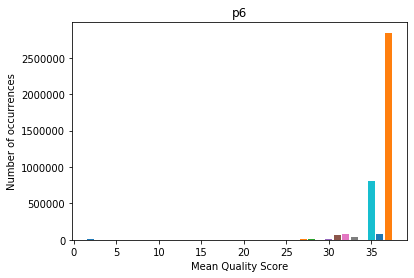

In [17]:
# A for loop that goes through the items in the dictionary.
for key, value in dict.items():
    
    # Plots the distribution of quality scores of a specific index position 
    # in the array.
    plt.bar(key,value)
    
# Labels a title
plt.title('p6')

# Labels X axis
plt.xlabel('Mean Quality Score')

# Labels Y axis
plt.ylabel('Number of occurrences')






Text(0, 0.5, 'Number of occurrences')

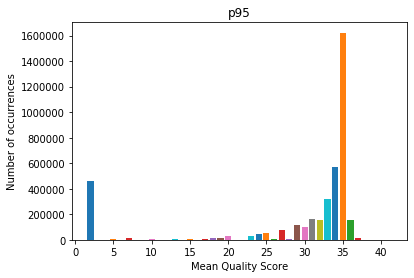

In [18]:
#Use this cell to generate your position 95 plot in Jupyter.
#Otherwise, issue a print statement so that the name of your plot file is printed.

# A for loop that goes through the items in the dictionary.
for key, value in dict2.items():
    
    # Plots the distribution of quality scores of a specific index position 
    # in the array.
    plt.bar(key,value)
    
# Labels a title
plt.title('p95')

# Labels X axis
plt.xlabel('Mean Quality Score')

# Labels Y axis
plt.ylabel('Number of occurrences')



In [22]:
assert len(all_qscores) == 101
assert len(all_qscores[47]) == 4000000
assert all_qscores[57][826109] == 33
assert median[54] == 38
assert median[99] == 34
assert all_qscores[1][500000:500200] == [31]*200
assert all_qscores[97][3999900:4000000] == [39]*85 + [40]*5 + [41]*10